# Week4 - Lab

Take a look at these toy datasets. Perform the following operations
* Train-test split
* Train a linear regression model
* Evaluate/create residual plots
* Explain findings

# This LAb is in Collaboration of Ayushi Bhujade and Jainam Maheshkumar Patel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

data1 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_1.csv', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/regression/lab4_2.csv', index_col=0)

#Data 1

In [2]:
data1.head()

,X,y
0,50,147
1,82,246
2,66,207
3,35,105
4,81,240


In [3]:
#1 train test split

from sklearn.model_selection import train_test_split
x_data1= data1[["X"]]
y_data1= data1[["y"]]
x_train1, x_test1, y_train1, y_test1 =  train_test_split (x_data1, y_data1, test_size=0.2)

print ('total no. of samples: ', data1.shape)
print ('no. of train samples: ', x_train1.shape)
print ('no. of train samples: ', x_test1.shape)
print ('no. of y train samples: ', y_train1.shape)
print ('no. of y train samples: ', y_test1.shape)

total no. of samples:  (100, 2)
no. of train samples:  (80, 1)
no. of train samples:  (20, 1)
no. of y train samples:  (80, 1)
no. of y train samples:  (20, 1)


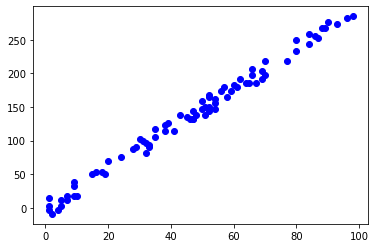

In [4]:
# train data distriution
plt.scatter(x_train1, y_train1, color='b')
plt.xlabel=("X")
plt.ylabel=("y")
plt.show()

In [5]:
#2. Train a linear regression model
from sklearn  import linear_model
lre1=linear_model.LinearRegression()
lre1.fit(x_train1, y_train1)

print("coefficients: ", lre1.coef_)
print("intercept: ", lre1.intercept_)

coefficients:  [[2.98115319]]
intercept:  [-0.85286388]


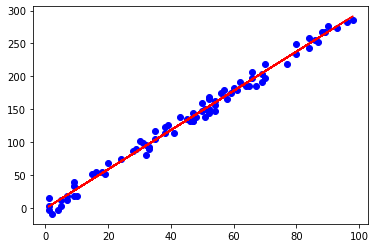

In [6]:
plt.scatter(x_train1, y_train1, color='b')
plt.plot(x_train1, lre1.coef_[0][0]* x_train1+lre1.intercept_, color='r')
plt.xlabel=("X")
plt.ylabel=("y")
plt.show()


In [7]:
#3. evaluate
from sklearn.metrics import r2_score

yhat1=lre1.predict(x_test1)
print("Mean squared error (MSE), %.2f" %np.mean((yhat1-y_test1)**2))
print("R2 - score: %.2f" %r2_score(y_test1,yhat1))

Mean squared error (MSE), 67.70
R2 - score: 0.99


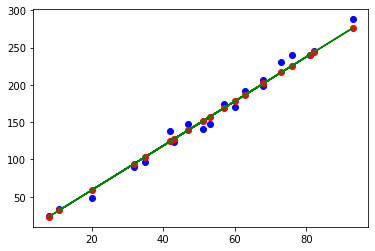

In [8]:
#plotting actual and predicted

plt.scatter(x_test1, y_test1, color='b')
plt.scatter(x_test1, yhat1, color='r')
plt.plot(x_test1, lre1.coef_[0][0]* x_test1+lre1.intercept_, color='g')
plt.xlabel=("X")
plt.ylabel=("y")
plt.show()

In [9]:
# 4. Explain the findings
print("1. The model is linear fit with coeffecient: ",lre1.coef_[0][0],  "and intercept: ",lre1.intercept_[0])
print("2. The model performs well with r2 score: ", r2_score(y_test1,yhat1), "on a split of 20% testing datset")

1. The model is linear fit with coeffecient:  2.9811531903270545 and intercept:  -0.8528638823844403
2. The model performs well with r2 score:  0.9871411948023433 on a split of 20% testing datset


#Data 2

In [10]:
data2.head()
data2["X2"].value_counts()

A    51
B    49
Name: X2, dtype: int64

In [11]:
#getting dummies for X2
dummies= pd.get_dummies(data2["X2"])


In [12]:
data2= data2.join(dummies)
data2.head()

,X1,X2,y,A,B
0,50,B,2510,0,1
1,82,B,6738,0,1
2,66,B,4355,0,1
3,35,A,2225,1,0
4,81,A,7560,1,0


In [13]:
#1 train test split

from sklearn.model_selection import train_test_split
x_data2= data2.drop(["y","X2"], axis=1)
y_data2= data2[["y"]]
x_train2, x_test2, y_train2, y_test2 =  train_test_split (x_data2, y_data2, test_size=0.2)

print ('total no. of samples: ', data2.shape)
print ('no. of train samples: ', x_train2.shape)
print ('no. of train samples: ', x_test2.shape)
print ('no. of y train samples: ', y_train2.shape)
print ('no. of y train samples: ', y_test2.shape)


total no. of samples:  (100, 5)
no. of train samples:  (80, 3)
no. of train samples:  (20, 3)
no. of y train samples:  (80, 1)
no. of y train samples:  (20, 1)


In [14]:
#2. Train a linear regression model
from sklearn  import linear_model
lre2=linear_model.LinearRegression()
lre2.fit(x_train2, y_train2)

print("coefficients: ", lre2.coef_)
print("intercept: ", lre2.intercept_)

coefficients:  [[  95.18788228  628.46494188 -628.46494188]]
intercept:  [-1067.61573627]


In [15]:
#3. evaluate
from sklearn.metrics import r2_score

yhat2=lre2.predict(x_test2)
print("Mean squared error (MSE), %.2f" %np.mean((yhat2-y_test2)**2))
print("R2 - score: %.2f" %r2_score(y_test2,yhat2))

Mean squared error (MSE), 473533.69
R2 - score: 0.89


In [16]:
# 4. Explain the findings
print("1. The model is multi-linear fit with coeffecient: ",lre2.coef_,  "and intercept: ",lre2.intercept_)
print("2. The model performs well with r2 score: ", r2_score(y_test2,yhat2), "on a split of 20% testing datset")

1. The model is multi-linear fit with coeffecient:  [[  95.18788228  628.46494188 -628.46494188]] and intercept:  [-1067.61573627]
2. The model performs well with r2 score:  0.8949486040303384 on a split of 20% testing datset
